# Jaden Fix Final: Stochastic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import datetime
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
from numpy.linalg import matrix_power  #need this for powers of the Markov matrix
import quantecon as qe

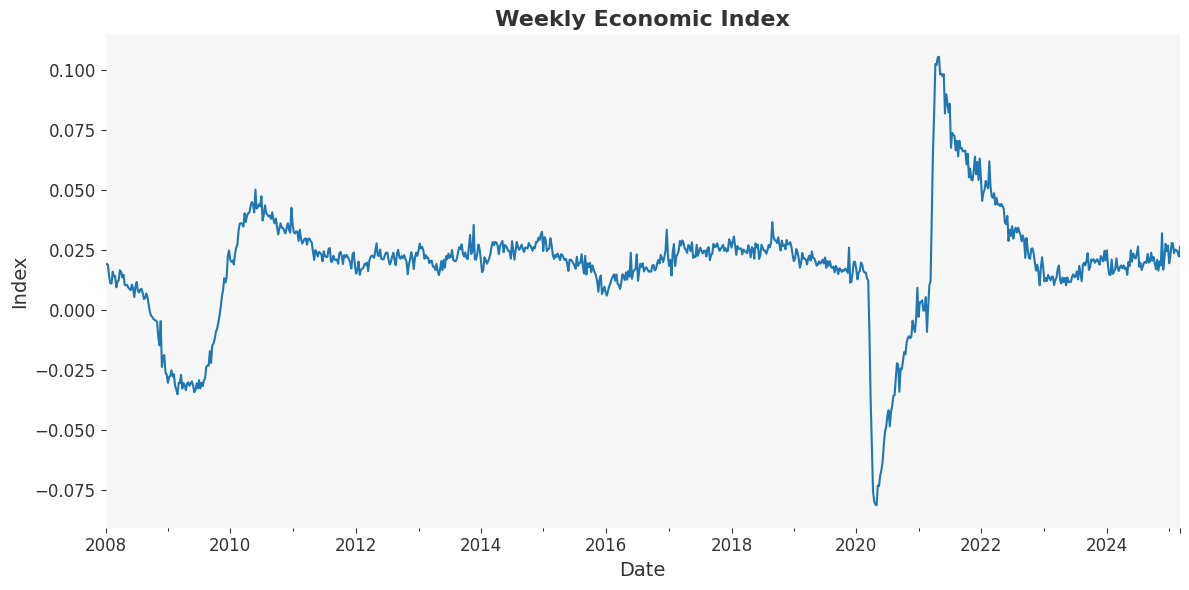

In [2]:
from fredapi import Fred
import datetime
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

# Original code remains unchanged
fred = Fred(api_key='6c0ecd6565503b64631fd2b36f71293a')

start = datetime.datetime(2008, 1, 5)
end = datetime.datetime(2025, 3, 31)

final = pdr.DataReader('WEI', 'fred', start, end) / 100
WEI = final['WEI']
ax = WEI.plot(title="Weekly Economic Index")  # Returns the matplotlib Axes

# New code to further enhance the aesthetics:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(12, 6)

# Set a custom face color for the axes and remove extra spines for a cleaner look
ax.set_facecolor('#f7f7f7')
for spine in ax.spines.values():
    spine.set_visible(False)

# Set labels with increased font sizes and a dark grey color for clarity
ax.set_xlabel("Date", fontsize=14, color='#333333')
ax.set_ylabel("Index", fontsize=14, color='#333333')
ax.set_title("Weekly Economic Index", fontsize=16, fontweight='bold', color='#333333')

# Update tick parameters for better readability
ax.tick_params(axis='both', labelsize=12, colors='#333333')

# Customize the grid for a modern look
ax.grid(False)

# Adjust layout to ensure nothing is cut off
plt.tight_layout()
plt.show()

In [3]:
final

,WEI
DATE,
2008-01-05,0.0194
2008-01-12,0.0193
2008-01-19,0.0190
2008-01-26,0.0141
2008-02-02,0.0113
...,...
2025-02-08,0.0253
2025-02-15,0.0250
2025-02-22,0.0243


# 1.

The edges of the bins are:
[-0.0812     -0.07136842 -0.06153684 -0.05170526 -0.04187368 -0.03204211
 -0.02221053 -0.01237895 -0.00254737  0.00728421  0.01711579  0.02694737
  0.03677895  0.04661053  0.05644211  0.06627368  0.07610526  0.08593684
  0.09576842  0.1056    ]

Here are the counts of the number of states in each bin:
[6, 3, 2, 5, 14, 34, 12, 22, 21, 154, 414, 121, 35, 17, 12, 11, 3, 3, 8]

All is well with the count data.


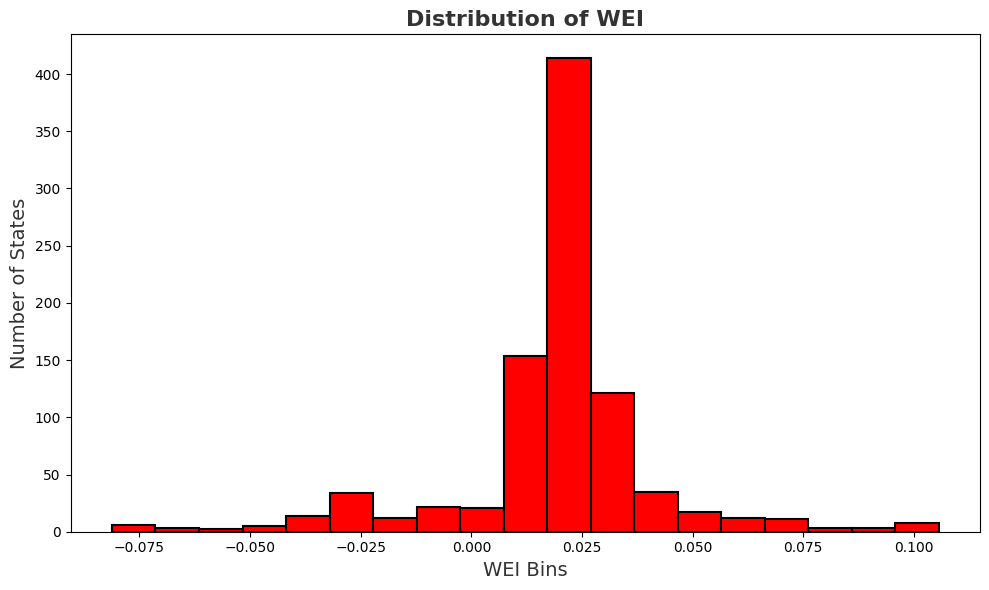

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure with a custom size
fig, ax = plt.subplots(figsize=(10, 6))

# extract bin values and number of states in each bin with enhanced aesthetics
(counts, bins, patches) = ax.hist(WEI, bins=19, color='red', edgecolor='black', linewidth=1.5)

# Enhance the plot appearance
ax.set_title("Distribution of WEI", fontsize=16, fontweight='bold', color='#333333')
ax.set_xlabel("WEI Bins", fontsize=14, color='#333333')
ax.set_ylabel("Number of States", fontsize=14, color='#333333')
ax.grid(False)
plt.tight_layout()

# Print the bin edges and counts with improved formatting
print("The edges of the bins are:")
print(bins)
print("\nHere are the counts of the number of states in each bin:")
print([int(x) for x in counts])
print("")

# I want to check that I have not missed a piece of data
if np.sum(counts) != len(WEI):
    print("We have lost some data.")
else:
    print("All is well with the count data.")

plt.show()

# 2.

In [5]:
final['State']=np.digitize(final['WEI'],bins)
print(final['State'].head(10))
print(final['State'].tail(10))
# np.digitize is a nice Python command that lumps data together
# It does so according to bins, and it uses half open intervals properly

DATE
2008-01-05    11
2008-01-12    11
2008-01-19    11
2008-01-26    10
2008-02-02    10
2008-02-09    10
2008-02-16    10
2008-02-23    10
2008-03-01    10
2008-03-08    10
Name: State, dtype: int64
DATE
2025-01-04    11
2025-01-11    11
2025-01-18    12
2025-01-25    12
2025-02-01    11
2025-02-08    11
2025-02-15    11
2025-02-22    11
2025-03-01    11
2025-03-08    11
Name: State, dtype: int64


# 3. Estimate the Markov matrix, and show its ergodic distribution. Report the long-run probability of being in a Covid state. (2 points)

In [6]:
from quantecon import MarkovChain

mc = qe.markov.estimate.estimate_mc(final['State'])

mc.P
pd.DataFrame(mc.P).style.background_gradient(axis=None, cmap='Dark2')\
    .set_properties(**{'max-width': '500px', 'font-size': '8pt'})\
    .format(precision = 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.83,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.67,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.50,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.60,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.07,0.07,0.29,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.21,0.68,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.17,0.58,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.05,0.05,0.05,0.68,0.14,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.67,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.69,0.26,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00


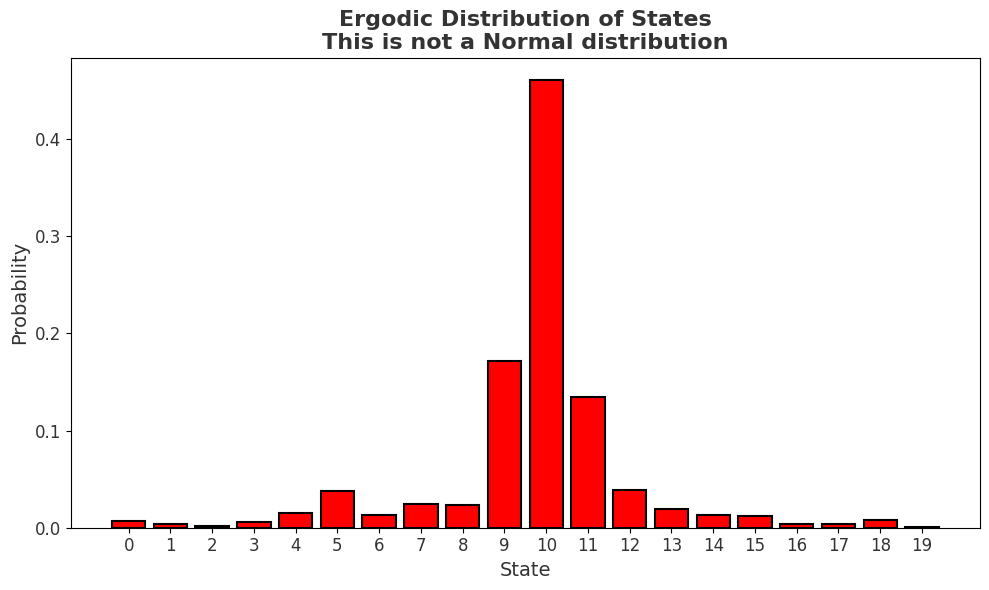

The ergodic probability of a Covid state is 0.007


In [7]:
import matplotlib.pyplot as plt
import numpy as np

eric = mc.stationary_distributions

# Create a larger figure for better clarity
plt.figure(figsize=(10, 6))

# Enhanced bar chart with custom color and styling
plt.bar(range(len(eric[0])), eric[0], color='red', edgecolor='black', linewidth=1.5)
plt.xticks(range(len(eric[0])), fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.xlabel("State", fontsize=14, color='#333333')
plt.ylabel("Probability", fontsize=14, color='#333333')

# Title with two lines and styled font
plt.title('Ergodic Distribution of States\nThis is not a Normal distribution',
          fontsize=16, fontweight='bold', color='#333333')

# Add a subtle horizontal grid for better readability
plt.tight_layout()
plt.show()

print('The ergodic probability of a Covid state is', np.around(eric[0][0], 3))

# 4. Calculate the consumption vector. (2 points)

In [8]:
#Calculate the mean growth rates by state
c = np.exp(final.groupby(by=["State"])[["WEI"]].mean())
c.columns=['consumption']
c

,consumption
State,
1,0.925705
2,0.935975
3,0.945823
4,0.954393
5,0.965681
6,0.972371
7,0.982456
8,0.992812
9,1.003296


# 5. Asset pricing kernel (4 points)

In [9]:
def kern(c0,c1,rho):
    """
    This function returns an asset pricing kernel 
    c0 is current consumption
    c1 is the vector of future consumptions
    rho is the inter-temporal elasticity of substitution
    """
    if rho == 1:
        return np.true_divide(1,c1)/(1/c0) 
    else: 
        return np.power(c1,-rho)/c0**(-rho)
    
def mkern(c,beta,rho):
    n = len(c) # number of states
    K=np.zeros((n,n)) # start with an array of zeros
    for i in range (n):
        K[i,:] = beta*kern(c.loc[i+1],c,rho).T  # each row is an asset pricing kernel for consumption in state i
    return(K)

beta = 0.97**(1/52)
rho = 2


K = mkern(c, beta, rho)

css_props = {'font-size': '18pt', 'text-align': 'center'}
cmap = plt.get_cmap('Dark2')
pd.DataFrame(K).style.background_gradient(axis=None, cmap=cmap)\
    .set_properties(**{'max-width': '500px', 'font-size': '8pt'})\
    .format(precision = 2)\
    .set_caption("Asset Pricing Kernel, rows are this week, columns are next week" )\
    .set_table_styles([{'selector': 'caption', 'props': list(css_props.items())}])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.00,0.98,0.96,0.94,0.92,0.91,0.89,0.87,0.85,0.83,0.82,0.81,0.79,0.77,0.76,0.75,0.73,0.72,0.70,0.69
1,1.02,1.00,0.98,0.96,0.94,0.93,0.91,0.89,0.87,0.85,0.84,0.82,0.81,0.79,0.77,0.76,0.74,0.73,0.72,0.71
2,1.04,1.02,1.00,0.98,0.96,0.95,0.93,0.91,0.89,0.87,0.86,0.84,0.82,0.81,0.79,0.78,0.76,0.75,0.73,0.72
3,1.06,1.04,1.02,1.00,0.98,0.96,0.94,0.92,0.90,0.89,0.87,0.86,0.84,0.82,0.80,0.79,0.77,0.76,0.74,0.74
4,1.09,1.06,1.04,1.02,1.00,0.99,0.97,0.95,0.93,0.91,0.89,0.88,0.86,0.84,0.82,0.81,0.79,0.78,0.76,0.75
5,1.10,1.08,1.06,1.04,1.01,1.00,0.98,0.96,0.94,0.92,0.90,0.89,0.87,0.85,0.83,0.82,0.80,0.79,0.77,0.77
6,1.13,1.10,1.08,1.06,1.03,1.02,1.00,0.98,0.96,0.94,0.92,0.91,0.89,0.87,0.85,0.84,0.82,0.81,0.79,0.78
7,1.15,1.12,1.10,1.08,1.06,1.04,1.02,1.00,0.98,0.96,0.94,0.93,0.91,0.89,0.87,0.86,0.84,0.83,0.81,0.80
8,1.17,1.15,1.12,1.10,1.08,1.06,1.04,1.02,1.00,0.98,0.96,0.95,0.93,0.91,0.89,0.88,0.85,0.84,0.82,0.81
9,1.20,1.17,1.15,1.13,1.10,1.09,1.06,1.04,1.02,1.00,0.98,0.97,0.95,0.93,0.91,0.89,0.87,0.86,0.84,0.83


In [10]:
# define a custom color map with all different colors
cmap = plt.get_cmap('Dark2')
pd.DataFrame(c.T).style.background_gradient(axis=None,cmap=cmap)\
    .set_properties(**{'max-width': '500px', 'font-size': '8pt'})\
    .format(precision = 3)


State,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
consumption,0.926,0.936,0.946,0.954,0.966,0.972,0.982,0.993,1.003,1.014,1.022,1.031,1.042,1.052,1.064,1.072,1.086,1.092,1.106,1.111


# Asset Pricing Kernel and Arrow Securities Pricing Matrix

Calculating the asset pricing kernel can be formulated by:

$$
K =
\left[
\begin{array}{c}
  \dfrac{\nabla U(c)}{\partial U/\partial c_1} \\
  \vdots \\
  \dfrac{\nabla U(c)}{\partial U/\partial c_n} \\
\end{array}
\right]
=
\left[
\begin{array}{ccc}
  \beta \dfrac{u'(c_1)}{u'(c_1)} & \dots & \beta \dfrac{u'(c_n)}{u'(c_1)} \\
  \vdots & \vdots & \vdots \\
  \beta \dfrac{u'(c_1)}{u'(c_n)} & \dots & \beta \dfrac{u'(c_n)}{u'(c_n)} \\
\end{array}
\right]
$$

Below is a detailed and intuitive explanation of this formulation:

1. **Ratio of Marginal Felicity:**  
   Consider $u'(c_i)$ as the extra satisfaction (or marginal felicity) derived from an additional unit of consumption in state $i$. The element  
   
   $$
   K_{ij} = \beta \frac{u'(c_j)}{u'(c_i)}
   $$
   
   represents how much an extra unit of consumption in state $j$ is valued relative to state $i$, after discounting by the factor $\beta$ (which reflects the agent’s time preference). Essentially, it tells you by what factor the marginal benefit in state $j$ is adjusted compared to that in state $i$.

2. **Diagonal Elements Are Identical:**  
   When $i = j$, the ratio simplifies to  
   
   $$
   K_{ii} = \beta \frac{u'(c_i)}{u'(c_i)} = \beta.
   $$
   
   In this case, since the comparison is within the same state, the marginal utilities cancel each other out, leaving only the discount factor $\beta$. Because $\beta$ is a fixed parameter that does not change across states, all diagonal elements of $K$ are identical.

3. **Asymmetry of $K$:**  
   The matrix $K$ is not symmetric. This is because the marginal rate of substitution between consumption in state $i$ and state $j$ is directional. For example, if state $i$ is a low-consumption state (implying a high marginal felicity due to diminishing returns) and state $j$ is a high-consumption state (with a lower marginal felicity), then the ratio 
   
   $$
   \frac{u'(c_j)}{u'(c_i)}
   $$
   
   will be different from its inverse 
   
   $$
   \frac{u'(c_i)}{u'(c_j)}.
   $$
   
   Since the states are ranked in order of increasing consumption, the marginal felicity in lower-index (low-consumption) states is higher. Consequently, every element in a row corresponding to a state with lower marginal utility (i.e., higher consumption) will be greater than the analogous element in a row corresponding to a state with higher marginal utility. This directional difference leads to the asymmetry in $K$.

4. **Independence from Markov Probabilities:**  
   The construction of $K$ depends solely on the agent's intertemporal preferences—captured by the utility function $u(\cdot)$ and the discount factor $\beta$—as well as the consumption levels in each state. It does not incorporate any information regarding the probabilities of transitioning between states (which are instead represented by the Markov transition matrix $M$). Therefore, $K$ is entirely independent of the Markov probabilities.

In summary, $K_{ij}$ is the ratio of the discounted marginal felicity in state $j$ relative to the marginal felicity in state $i$. A diagonal element compares the marginal felicity within the same state, leaving only the discount factor $\beta$ as the operative term—hence all diagonal elements are identical. Moreover, because the marginal rate of substitution between different states is directional (especially when states are ordered by increasing consumption), $K$ is not symmetric. Finally, $K$ is constructed solely from the agent’s preferences and consumption levels, and it does not depend on the probabilities of moving between states.

The asset pricing matrix for Arrow securities is then defined as the element-wise product of $K$ and the Markov transition matrix $M$:

$$
p = (K \,.*.\, M) =
\left[
\begin{array}{ccc}
  \beta \dfrac{u'(c_1)}{u'(c_1)}\,\pi_{11} & \dots & \beta \dfrac{u'(c_n)}{u'(c_1)}\,\pi_{1n} \\
  \vdots & \ddots & \vdots \\
  \beta \dfrac{u'(c_1)}{u'(c_n)}\,\pi_{n1} & \dots & \beta \dfrac{u'(c_n)}{u'(c_n)}\,\pi_{nn} \\
\end{array}
\right]
$$

Here, $p_{ij}$ is the price in state $i$ of an Arrow security that pays one unit of consumption in the next period if and only if state $j$ occurs. This formulation explicitly ties asset prices to the agent's intertemporal preferences (through $K$) and to the conditional probabilities of state transitions (through $M$).

# 6. Yield curves (2 points)

In [11]:
def pricing_T(M,K,R,T):
    """
    M is a markov matrix
    K is a pricing kernel
    R is a matrix of asset payouts.
    R is an n x m matrix.  
    There are n states and m assets.
    R(:,j) is the description of asset j
    The asset returns are by column.
    R(i,j) is what asset j pays if state i happens.
    This method returns a n x m matrix P
    P(i,j) is the price of asset j in state i
    This method prices assets that pay out in the period T only
    """
    if M.shape != K.shape:
        return('Markov matrix and pricing kernels are not conformable.')
    if M.shape[1] != R.shape[0]:
        return('Asset price matrix is not conformable.')
    M_K=np.multiply(M,K) #element-by-element multiplication
    P = np.matmul(np.linalg.matrix_power(M_K,T), R)  
    #raise M1 to the T the right multiply by R
    return(P)

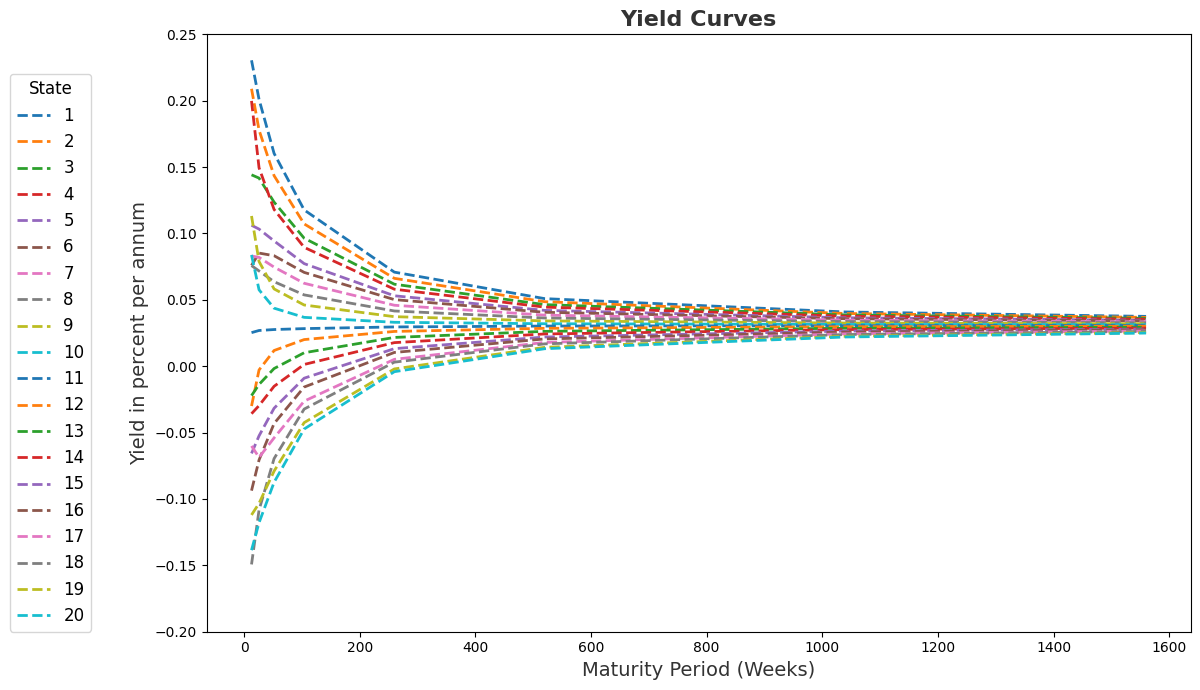

In [12]:
state_labels = range(1, 21)
# Store yields at each maturity in a dictionary where key is maturity period and value is yield %
dim = len(c)
yields = {}
r = np.array([[1]] * dim)
quarters = np.array([1, 2, 4, 8, 20, 40, 80, 120])
T = 13 * quarters
for t in T:
    P = pricing_T(mc.P, K, r, t)
    yields[t] = (1 / P[:, 0]) ** (52 / t) - 1
yields = pd.DataFrame(yields).transpose()
yields.columns = state_labels

# Create a larger, more aesthetic figure
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(yields, '--', linewidth=2)

# Set the y-axis limits
ax.set_ylim(-0.20, 0.25)

# Add a legend with improved styling
ax.legend(yields.columns, loc=(-0.2, 0.0), title="State", fontsize=12, title_fontsize=12)

# Set title and axis labels with custom fonts and colors
ax.set_title("Yield Curves", fontsize=16, fontweight='bold', color='#333333')
ax.set_xlabel("Maturity Period (Weeks)", fontsize=14, color='#333333')
ax.set_ylabel("Yield in percent per annum", fontsize=14, color='#333333')

# Add a subtle grid for better readability
ax.grid(False)

# Adjust layout to ensure everything fits well
plt.tight_layout()
plt.show()

# 7.

An inverted yield curve—where long-term interest rates fall below short-term rates—is widely interpreted as a signal that the market expects slower growth or even a recession in the near future. When investors observe an inverted yield curve, it implies that they are demanding less return for holding long-term securities, anticipating lower future economic activity. 

Given that market participants typically have a solid grasp of the underlying transition probabilities (as captured by historical data or models), the shape of the yield curve provides a direct window into the market’s expectations for the next period’s economic state. In essence, if the yield curve is inverted, it suggests that the economy is likely to shift toward recessionary conditions in the immediate future. This information is crucial because it allows economic agents and policymakers to adjust their strategies based on the anticipated distribution of future economic outcomes.

# 8.  

In [13]:
def pricing_stock(M,K,r):
    """
    M is a markov matrix
    K is a pricing kernel
    R is an n x 1 matrix of asset payouts, though of as dividends 
    There are n states
    R(i) is what the asset pays if state i happens.
    This method returns a n x 1 vector p
    p(i) is the price of this stock in state i
    """
    n=M.shape[0] #number of states
    if M.shape != K.shape:
        return('Markov matrix and pricing kernels are not conformable.')
    if M.shape[1] != r.shape[0]:
        return('Asset price matrix is not conformable.')
    M_K=np.multiply(M,K) #element-by-element multiplication
    p=np.linalg.inv(np.identity(n)-M_K)@ r
    return(p)

In [14]:
r = c.values # consumption in all the states
stock_prices = pricing_stock(mc.P,K,r)

# define a custom color map with all different colors
cmap = plt.get_cmap('Dark2')
pd.DataFrame(stock_prices.T).style.background_gradient(axis=None,cmap=cmap)\
    .set_properties(**{'max-width': '500px', 'font-size': '8pt'})\
    .format(precision = 0)\
    .set_caption("Stock Prices" )\
    .set_table_styles([{'selector': 'caption', 'props': list(css_props.items())}])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1440,1472,1503,1529,1565,1587,1619,1653,1687,1722,1751,1780,1819,1854,1896,1923,1972,1993,2044,2065


# 9. 

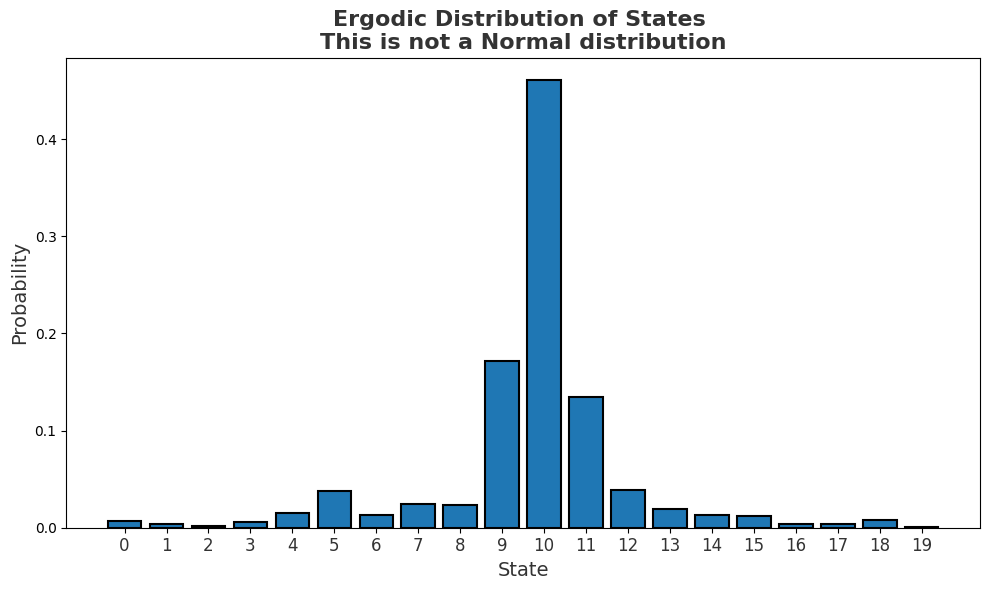

The old ergodic probability of a Covid state is 0.007


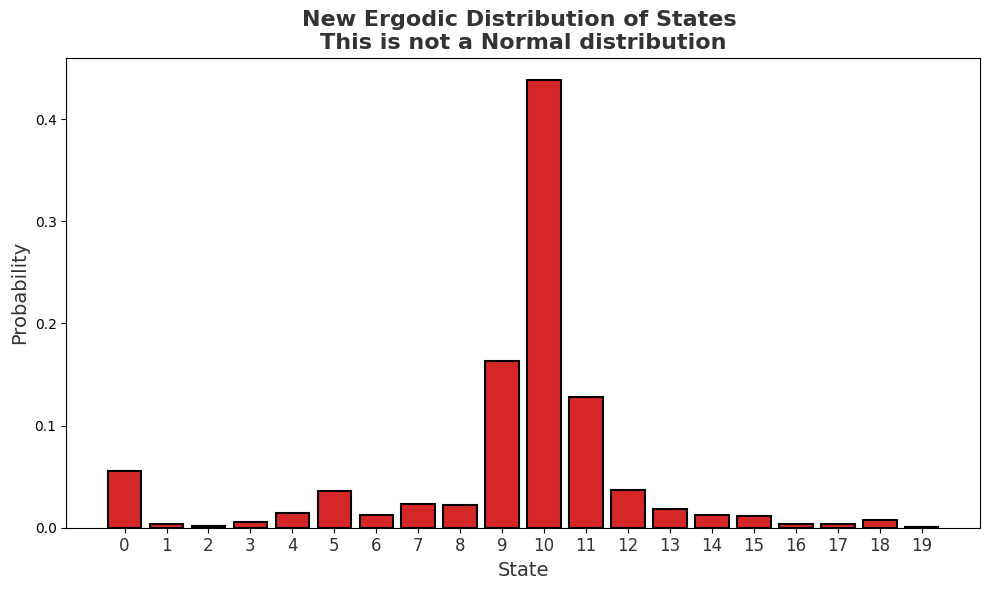

The new ergodic probability of a Covid state is 0.055


In [15]:
# create a new Markov matrix from the old one
p52 = 1/52   #this value comes from the escape probability of a geometric random variable.
M_52 = np.zeros((dim, dim))
M_52[0, 0] = 1 - p52
M_52[0, 1] = p52
M_52[1:, :] = mc.P[1:, :]

mc52 = qe.MarkovChain(M_52)  # define the Markov chain, using Quantecon

eric = mc.stationary_distributions

# Plot for the old ergodic distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(eric[0])), eric[0], color='#1f77b4', edgecolor='black', linewidth=1.5)
plt.xticks(range(len(eric[0])), fontsize=12, color='#333333')
plt.xlabel("State", fontsize=14, color='#333333')
plt.ylabel("Probability", fontsize=14, color='#333333')
plt.title('Ergodic Distribution of States \nThis is not a Normal distribution', fontsize=16, fontweight='bold', color='#333333')
plt.grid(False)
plt.tight_layout()
plt.show()

print('The old ergodic probability of a Covid state is', np.around(eric[0][0], 3))

eric52 = mc52.stationary_distributions

# Plot for the new ergodic distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(eric52[0])), eric52[0], color='#d62728', edgecolor='black', linewidth=1.5)
plt.xticks(range(len(eric52[0])), fontsize=12, color='#333333')
plt.xlabel("State", fontsize=14, color='#333333')
plt.ylabel("Probability", fontsize=14, color='#333333')
plt.title('New Ergodic Distribution of States \nThis is not a Normal distribution', fontsize=16, fontweight='bold', color='#333333')
plt.grid(False)
plt.tight_layout()
plt.show()

print('The new ergodic probability of a Covid state is', np.around(eric52[0][0], 3))

# 10.

In [16]:
last_week=final['State'][-1]
T=5200
s=mc.simulate(ts_length=T, init=last_week)
s52=mc52.simulate(ts_length=T, init=0)  #Lock it down now, baby!

/var/folders/lk/4ym49gg94jz0bf7w8jnp_wnh0000gp/T/ipykernel_88269/4215714300.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_week=final['State'][-1]


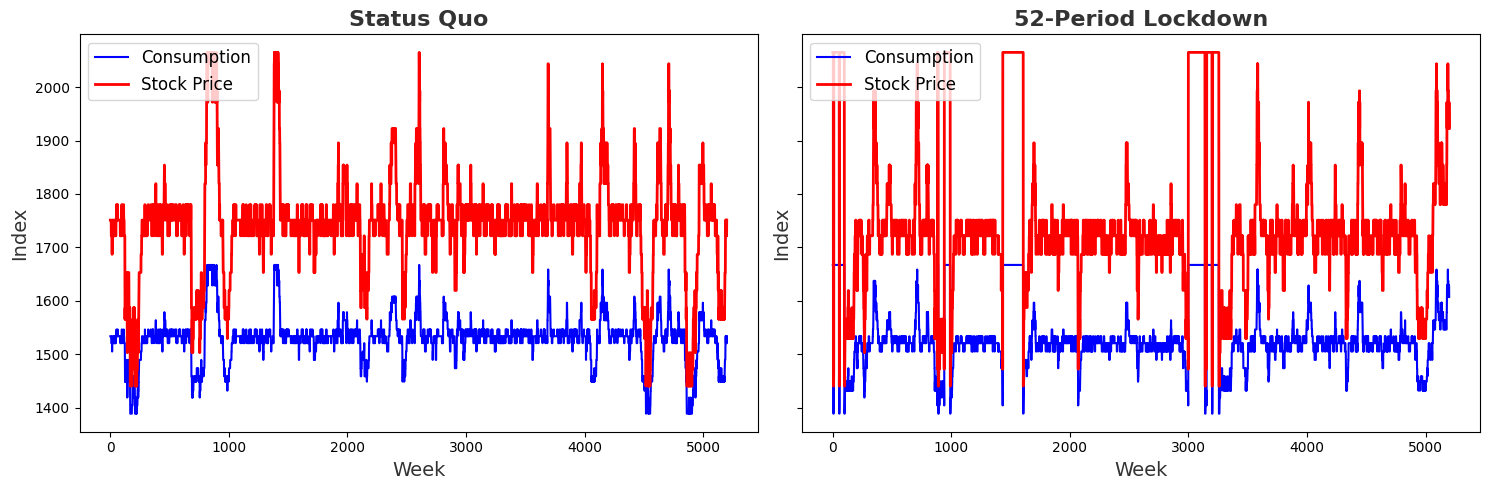

In [17]:
# stack the endogenous variables correctly
x = np.zeros((2, dim))
scale = 1500
x[0, :] = scale * c.values.T
x[1, :] = stock_prices.reshape(20,)

endogenous = x[:, s-1]
endogenous52 = x[:, s52-1]

# plot the outcome with enhanced aesthetics
fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), ncols=2, sharey=True)

# Plot for Status Quo
ax1.plot(endogenous[0, :], label="Consumption", color='blue', linewidth=1.5)
ax1.plot(endogenous[1, :], label="Stock Price", color='red', linewidth=2)
ax1.set_title("Status Quo", fontsize=16, fontweight='bold', color='#333333')
ax1.set_xlabel("Week", fontsize=14, color='#333333')
ax1.set_ylabel("Index", fontsize=14, color='#333333')
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(False)

# Plot for 52-Period Lockdown
ax2.plot(endogenous52[0, :], label="Consumption", color='blue', linewidth=1.5)
ax2.plot(endogenous52[1, :], label="Stock Price", color='red', linewidth=2)
ax2.set_title("52-Period Lockdown", fontsize=16, fontweight='bold', color='#333333')
ax2.set_xlabel("Week", fontsize=14, color='#333333')
ax2.set_ylabel("Index", fontsize=14, color='#333333')
ax2.legend(loc='upper left', fontsize=12)
ax2.grid(False)

plt.tight_layout()
plt.show()

# 11: 
using https://www.pnas.org/content/117/36/22035

Using the framework of ergodic distributions, one finds that under normal circumstances the long‐run expected consumption is around 1.018. When we model a prolonged lockdown—say, a year-long shutdown that mimics an extended four‐period lockdown—this expected consumption falls slightly, to roughly 1.013. In other words, if we were to experience the worst possible scenario forever, the maximum contraction in consumption might be about 8% (given that the worst state has a consumption level near 0.92). However, it’s important to emphasize that these severe “COVID states” are very infrequent. In the ergodic distribution, the probability of being in such a state rises from only 0.7% under the status quo to about 5.8% under a prolonged lockdown—a seven to eightfold increase in risk.

From a perspective that prioritizes the worst outcomes (as a Rawlsian might), this increased risk is significant. It implies that, on average, the chance of experiencing a deep economic downturn nearly eight times higher under a year-long lockdown could be highly detrimental for those at the bottom of the distribution. Yet, when we simulate the full life-cycle utility—assuming, for instance, that an average person has about 40 remaining years (or 52 × 40 periods)—the average utility loss is only around 0.6%. In monetary terms, if we roughly equate the consumption loss to about 1.5% of annual GDP per capita (approximately $70k), this corresponds to a per-person cost of roughly $1050.

The article in , and related work by Goldstein and Lee, further emphasize that when evaluated through cohort life tables, the loss in expected remaining life due to COVID-19 is extremely small on a per-person basis. For instance, if the additional deaths amounted to 1.1 million, the total loss of remaining life years is less than 1/1,000th of the population’s remaining life expectancy. In a concrete example, if a year-long lockdown had saved all 1.1 million lives—which is an optimistic best-case scenario—it might have granted each American roughly two extra weeks of quality life. Given estimates that a quality year of life is valued at about $150,000, this two-week gain is worth roughly $6,000 per person.

Thus, while a year-long lockdown would increase the risk of falling into a dire economic state, the actual loss in consumption and average utility appears modest compared to the potential gains in preserved life years. In a strict cost-benefit framework, if the lockdown had indeed saved all the lives it was designed to protect, then the small consumption loss (around 0.6% to 1.5% of GDP per capita) would be more than offset by the tremendous value of the additional life years preserved.

It is important, however, to treat these numbers with caution. They are derived from specific models with assumptions about risk preferences and long-run dynamics, and they do not capture all societal costs such as mental health issues, increases in non-economic harm (like rising suicide rates), or other collateral damage. In sum, if a year-long lockdown had saved all the lives it purported to protect, the economic costs—in terms of average utility loss—appear relatively minor when compared to the substantial value placed on the additional life years.

The average utility for the status quo is 899.8
Its standard deviation is 5.9
The certainty equivalent of this average is 2.114
The average utility for a 52-period lockdown is 894.7
Its standard deviation is 6.9
The certainty equivalent of this average is 2.1


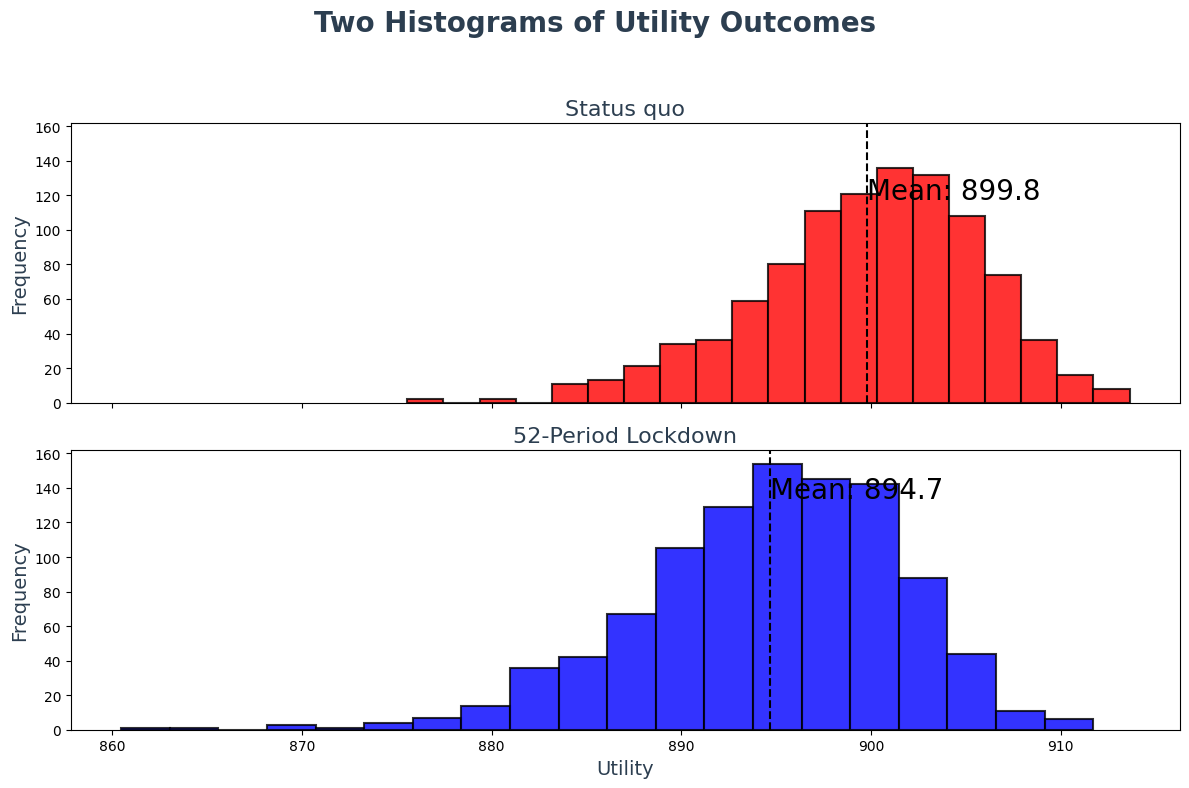

In [18]:
T = 40*52  # average person is 43 years old and has 43 years to live
trials = 1000
beta = 0.97**(1/52)
rho = 2

def utility(cons, beta, rho):
    n = len(cons)
    u = 0
    for i in range(n):
        u += ((beta**i)*cons[i]**(1-rho) - 1) / (1 - rho)
    return u

def certainty_equivalent(u, beta, rho):
    ce = ((1 - beta)*(1 - rho)*u + 1)**(1/(1 - rho))
    return ce

u = [] 
for i in range(trials):
    s = mc.simulate(ts_length=T, init=last_week)
    consumption = np.array(c['consumption'][s])
    u.append(utility(consumption, beta, rho))
    
u52 = [] 
for i in range(trials):
    s52 = mc.simulate(ts_length=T, init=1)
    consumption = np.array(c['consumption'][s52])
    u52.append(utility(consumption, beta, rho))

print("The average utility for the status quo is", np.round(np.mean(u), 1))
print("Its standard deviation is", np.round(np.std(u), 1))
print("The certainty equivalent of this average is", np.around(certainty_equivalent(np.mean(u), beta, rho), 3))

print("The average utility for a 52-period lockdown is", np.round(np.mean(u52), 1))
print("Its standard deviation is", np.round(np.std(u52), 1))
print("The certainty equivalent of this average is", np.around(certainty_equivalent(np.mean(u52), beta, rho), 3))
    
# plot the utility outcomes
bins = np.histogram(np.hstack((u, u52)))[1]  # get the bin edges

# Create two subplots with enhanced aesthetics
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(12, 8))
fig.suptitle('Two Histograms of Utility Outcomes', fontsize=20, fontweight='bold', color='#2c3e50')

# Plot for the Status quo utility outcomes
n1, bins1, patches1 = axs[0].hist(u, bins=20, color='red', edgecolor='black', linewidth=1.5, alpha=0.8)
axs[0].set_title("Status quo", fontsize=16, color='#2c3e50')
axs[0].set_ylabel("Frequency", fontsize=14, color='#2c3e50')
axs[0].grid(False)
mean_u = np.mean(u)
axs[0].axvline(mean_u, color='black', linestyle='dashed', linewidth=1.5)
axs[0].text(mean_u, max(n1)*0.9, f'Mean: {mean_u:.1f}', verticalalignment='center', fontsize=20, color='black')

# Plot for the 52-Period Lockdown utility outcomes
n2, bins2, patches2 = axs[1].hist(u52, bins=20, color='blue', edgecolor='black', linewidth=1.5, alpha=0.8)
axs[1].set_title("52-Period Lockdown", fontsize=16, color='#2c3e50')
axs[1].set_xlabel("Utility", fontsize=14, color='#2c3e50')
axs[1].set_ylabel("Frequency", fontsize=14, color='#2c3e50')
axs[1].grid(False)
mean_u52 = np.mean(u52)
axs[1].axvline(mean_u52, color='black', linestyle='dashed', linewidth=1.5)
axs[1].text(mean_u52, max(n2)*0.9, f'Mean: {mean_u52:.1f}', verticalalignment='center', fontsize=20, color='black')

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

In [19]:
print(eric[0]@c.values)  #long-run expected consumption
print(eric52[0]@c.values)  #long-run expected consumption
print(np.log(np.mean(u)/np.mean(u52))) #difference in percent between expected utilities

[1.01974299]
[1.01515088]
0.0057051193181674


# The SEIR Model

The SEIR model describes the dynamics of an infectious disease by splitting the population into four compartments: **Susceptible (S)**, **Exposed (E)**, **Infected (I)**, and **Recovered (R)**. Individuals progress through these stages in the following order:

$$
S \rightarrow E \rightarrow I \rightarrow R.
$$

When the transmission rate is positive and there is at least one infected individual initially (i.e., $i(0) > 0$), the disease will eventually infect the entire population.

The evolution of the system is governed by the differential equations:

$$
\begin{aligned}
\dot{s}(t) &= -\beta(t)\, s(t)\, i(t), \\
\dot{e}(t) &= \beta(t)\, s(t)\, i(t) - \sigma\, e(t), \\
\dot{i}(t) &= \sigma\, e(t) - \gamma\, i(t).
\end{aligned}
$$

Here’s a deeper and more intuitive explanation of each component:

1. **Transmission Rate, $\beta(t)$:**  
   This parameter represents the rate at which susceptible individuals come into contact with infected individuals in a way that causes exposure. Think of $\beta(t)$ as measuring how frequently people “bump into” each other and, as a result, spread the virus. A higher $\beta(t)$ means that contacts leading to infection are more common.

2. **Infection Rate, $\sigma$:**  
   Once someone is exposed to the virus, they do not become infectious immediately. The infection rate $\sigma$ describes how quickly these exposed individuals transition into the infected state. It essentially captures the incubation period of the disease—the time delay before an exposed individual starts spreading the virus.

3. **Recovery Rate, $\gamma$:**  
   This rate defines how fast infected individuals recover (or are removed from the pool of infectious individuals, such as by death). A higher $\gamma$ means that infected individuals cease being infectious more quickly, which can help slow the spread of the disease.

4. **Time Derivatives:**  
   The dot above each variable, such as $\dot{s}(t)$, denotes the time derivative $\frac{d s(t)}{dt}$. This indicates the rate at which the number (or fraction) of individuals in each compartment changes over time.

### Intuitive Flow of the Model

- **Susceptible ($S$):**  
  These are individuals who have not yet been infected. They are at risk whenever they encounter an infected person.

- **Exposed ($E$):**  
  After contact with an infected individual, a susceptible person moves into the exposed class. At this stage, although the person has been infected, they are not yet infectious. This stage represents the incubation period.

- **Infected ($I$):**  
  Exposed individuals become infected at a rate governed by $\sigma$. Once in this compartment, they can transmit the virus to others.

- **Recovered ($R$):**  
  Eventually, infected individuals recover or are removed from the population (due to recovery or death) at a rate $\gamma$. They no longer contribute to the spread of the disease.

In summary, the SEIR model provides a framework for understanding how an infectious disease propagates through a population. It emphasizes that the progression of the disease is determined by both the contact rate between susceptible and infected individuals and the inherent delays in becoming infectious and then recovering. This framework is crucial for designing interventions, as it highlights the key parameters—$\beta(t)$, $\sigma$, and $\gamma$—that influence the speed and reach of an epidemic.

## Sargent's Code: SEIR Model

In this section, we explore whether a year-long lockdown can ultimately reduce the number of deaths in the United States. The SEIR model—dividing the population into Susceptible (S), Exposed (E), Infected (I), and Removed (R, meaning either dead or otherwise removed)—serves as our framework for analysis.

The code presented here is adapted from Emory Rapaport's solution, which itself draws on the work of Sargent and Stachurski.

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp
from scipy.integrate import odeint

In [21]:
pop_size = 3.3e8
γ = 1 / 18  #match an average illness duration of 18 days
σ = 1 / 5.2 #average incubation period of 5.2 periods

In [22]:
def F(x, t, R0=1.6):
    """
    Time derivative of the state vector.

        * x is the state vector (array_like)
        * t is time (scalar)
        * R0 is the effective transmission rate, defaulting to a constant

    """
    s, e, i = x

    # New exposure of susceptibles
    β = R0(t) * γ if callable(R0) else R0 * γ
    ne = β * s * i

    # Time derivatives
    ds = - ne
    de = ne - σ * e
    di = σ * e - γ * i

    return ds, de, di

In [23]:
# initial conditions of s, e, i
i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0

x_0 = s_0, e_0, i_0

In [24]:
def solve_path(R0, t_vec, x_init=x_0):

    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return i_path, c_path

In [25]:
# Running of Experiment

t_length = 730
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

#R0 is constant in Experiment 1
R0_vals = np.linspace(1.6, 3.0, 6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [], []

for r in R0_vals:
    i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

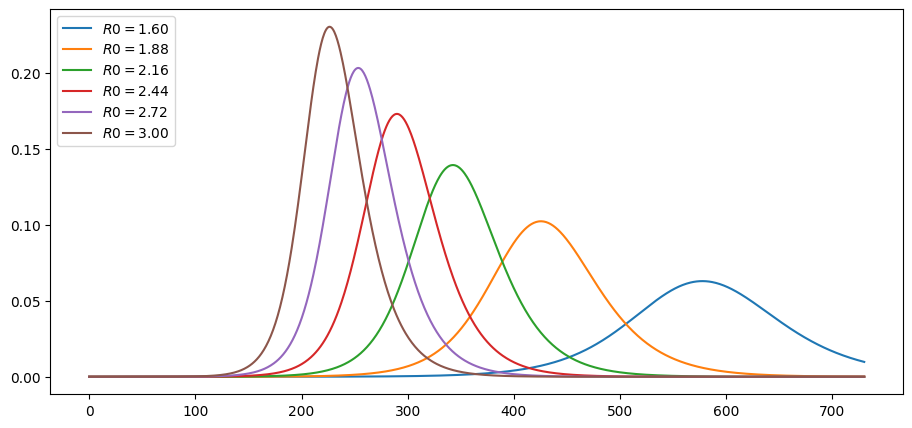

In [26]:
def plot_paths(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)

    ax.legend(loc='upper left')

    plt.show()

plot_paths(i_paths, labels)

This graph shows how the infection trajectory changes for different values of $R_0$ (the basic reproduction number). Each curve plots the fraction of the population that is infected over time, with each line corresponding to a different $R_0$ value.

- **Higher $R_0$ (e.g., 3.00)**  
  When $R_0$ is large, each infected individual transmits the disease to more people on average. As a result, the infection spreads more rapidly, causing the peak of the epidemic to occur sooner and at a higher level. In other words, a higher $R_0$ compresses the timeline but amplifies the peak.

- **Lower $R_0$ (e.g., 1.60)**  
  A smaller $R_0$ means each infected individual infects fewer people, so the disease grows more slowly. Consequently, the infection curve peaks later and at a lower maximum. This delay and reduction in peak size make intuitive sense because slower transmission takes more time to build up, and it never reaches as large a fraction of the population at once.

Overall, the figure highlights how even moderate changes in $R_0$ can substantially alter both the timing and magnitude of the epidemic’s peak. A higher $R_0$ compresses the outbreak into a shorter time frame with more simultaneous infections, whereas a lower $R_0$ stretches out the epidemic and lowers its maximum intensity.

In [27]:
# Experiment 2: R0 is a fraction of time

def R0_mitigating(t, r0=3, η=1, r_bar=1.6):
    R0 = r0 * exp(- η * t) + (1 - exp(- η * t)) * r_bar
    return R0

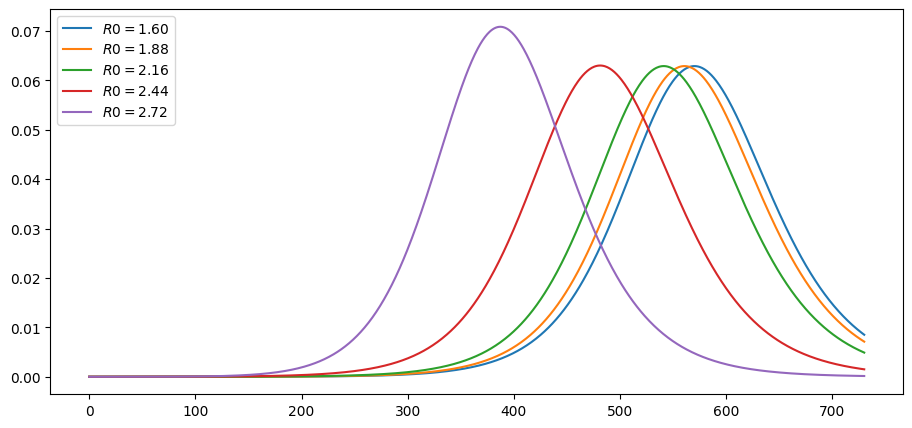

In [28]:
η_vals = 1/5, 1/10, 1/20, 1/50, 1/100

i_paths, c_paths = [], []

for η in η_vals:
    R0 = lambda t: R0_mitigating(t, η=η)
    i_path, c_path = solve_path(R0, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)
    
plot_paths(i_paths, labels)

This figure illustrates how gradually increasing the effective reproduction number (from a lower value up to the “true” $R_0 = 3$) postpones the peak of the infection curve. By temporarily keeping $R_0$ below 3—akin to social distancing measures—fewer people become infected early on, causing the infection wave to build more slowly. Consequently, the highest point of the outbreak shifts to a later time, even though it may still reach a substantial fraction of the population once $R_0$ eventually reaches 3. This delay can be beneficial from a public health perspective, as it spreads out infections over a longer period and helps reduce immediate strain on healthcare systems.

Let's use Sargent's code to contrast two different mitigation strategies:

- **Scenario 1:** Keep $R_0$ at 0.5 for the first 30 days, then raise it to 3 for the remaining 17 months. This represents a short, one-month lockdown before returning to normal contact rates.
- **Scenario 2:** Keep $R_0$ at 0.5 for the first 120 days, then raise it to 3 for the remaining 14 months. This simulates a more prolonged, four-month lockdown.

By comparing these two scenarios, we can see how extending the period of reduced $R_0$ influences the timing and severity of the epidemic’s peak.

In [29]:
# initial conditions
i_0 = 10_442 / pop_size  #start with 10442 infected people on 20 March 2020
# see https://en.wikipedia.org/wiki/COVID-19_pandemic_cases_in_March_2020
e_0 = 3*i_0  #their families are exposed, for example
s_0 = 1 - i_0 - e_0
x_0 = s_0, e_0, i_0

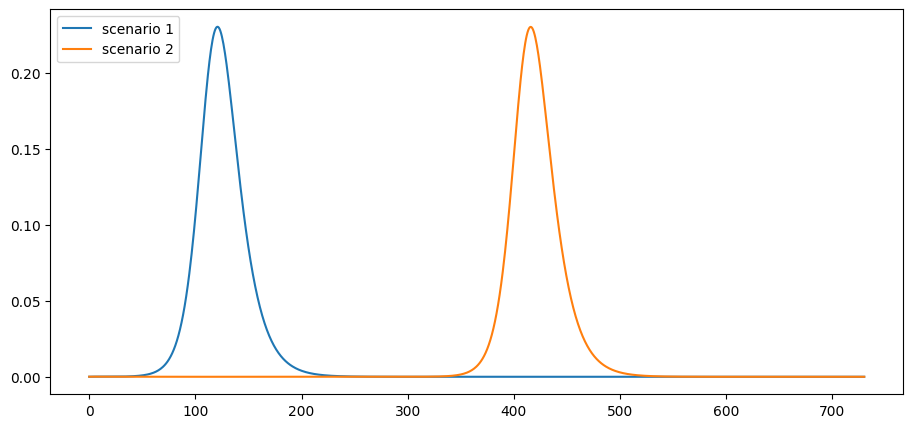

In [30]:
t_length = 365*3 #three years out
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

R0_paths = (lambda t: 0.5 if t < 30 else 3,
            lambda t: 0.5 if t < 365 else 3)

labels = [f'scenario {i}' for i in (1, 2)]

i_paths, c_paths = [], []

for R0 in R0_paths:
    i_path, c_path = solve_path(R0, t_vec, x_init=x_0)
    i_paths.append(i_path)
    c_paths.append(c_path)

plot_paths(i_paths, labels)

From this figure, we see that imposing a year-long lockdown (orange curve) simply delays the peak of infections rather than reducing overall fatalities, whereas the shorter lockdown (blue curve) triggers an earlier but similarly large outbreak. In other words, holding $R_0$ low for an extended period pushes the infection wave further into the future without necessarily mitigating the total death toll—unless the initial number of infected individuals is sufficiently small.

These outcomes can be influenced by political decisions and societal events that shape public behavior. For instance, a government might decide to reopen due to economic pressures or popular demand, while large gatherings (e.g., political rallies or major sporting events) can rapidly drive $R_0$ back up. In such cases, even a prolonged lockdown period may ultimately fail to prevent a surge in infections once restrictions are lifted. 

The model also suggests that, under certain initial conditions—such as when the infected population starts off extremely low—prolonged lockdowns can be more effective. However, if a moderate number of infections already exist, the system can exhibit near-singular behavior once lockdown measures are lifted, causing a sharp rise in cases. Ultimately, these findings underscore how delicate policy decisions and political dynamics can shape the trajectory of an epidemic, sometimes merely postponing rather than averting a substantial outbreak.